In [78]:
from __future__ import division
import numpy as np
import matplotlib
from scipy.signal import welch

font = {'weight' : 'bold', 'size'   : 22}

import matplotlib
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (12,8)
import matplotlib.pyplot as plt


import colorednoise as cn


import sys
sys.path.append('../')
from src.makeLISAdata import LISAdata

In [171]:
params= []
inj = []
ld = LISAdata(params, inj)

In [176]:
frange = np.arange(2e-5, 1, 1e-5)
Spos, Sacc = ld.fundamental_noise_spectrum(frange)

fs = 8
## Make gaussina data with the 

#spectrum of the position noise
Np = ld.gaussianData(Spos, frange, fs=fs, dur=3e6)

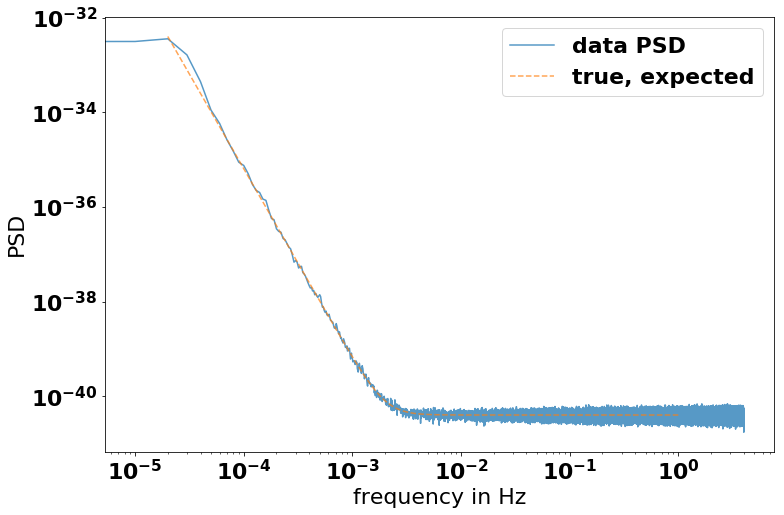

In [177]:
Fp, Sp = welch(Np, fs=fs, nperseg=int(1e5*fs))
plt.loglog(Fp, Sp, label='data PSD', alpha=0.75)
plt.plot(frange, Spos ,'--' ,label='true, expected', alpha=0.7)
plt.xlabel('frequency in Hz')
plt.ylabel('PSD')
plt.legend()

Now for timeshifts. Lets time shift by $\tau$ seconds and add to the time series. We would expect the spectrum would be now $4 S_{pos} \cos^2(f_0)$, where $f_0 =  \pi f \tau $


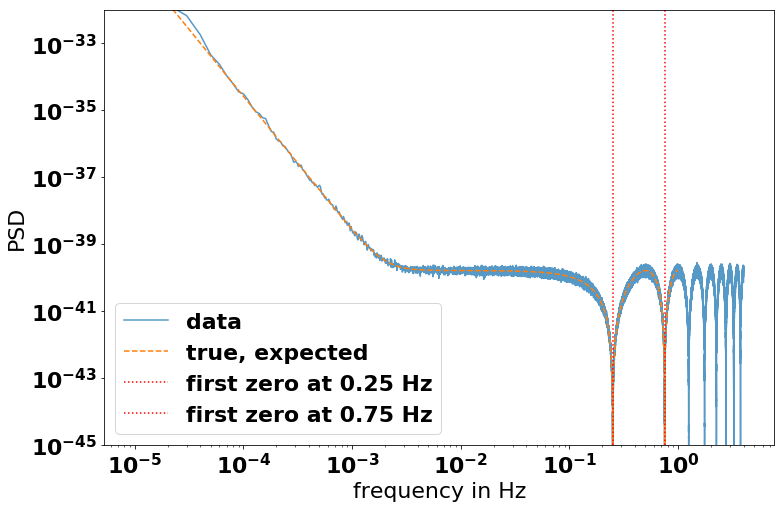

In [178]:
tau = 2

# shift index
tshift = int(tau*fs)

S2_ther = 4*Spos * (np.cos(np.pi*frange*tau))**2

# shifted time series
N2 = Np[tshift:]+ Np[0:-tshift]

F2, S2 = welch(N2, fs=fs, nperseg=int(1e5*fs))

plt.loglog(F2, S2, label='data', alpha=0.75)
plt.plot(frange, S2_ther ,'--' ,label='true, expected')
plt.axvline(0.25,linestyle=':' ,color='r' ,label='first zero at 0.25 Hz')
plt.axvline(0.75,linestyle=':', color='r' ,label='first zero at 0.75 Hz')
plt.xlabel('frequency in Hz')
plt.ylabel('PSD')
plt.ylim(1e-45, 1e-32)
plt.legend()

In [ ]:
beta = 1 # the exponent
samples = int(3e6) # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)
fy, Sy = welch()

In [109]:
2/fs

8.0

In [128]:
np.pi*1e-2*50 *2 / np.pi

1.0000000000000002